In [1]:
x = 1

In [2]:
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
methods = ['jamie', 'knn', 'knn_batch', 'linear_regression', 'mean', 'monae', 'scbutterfly', 'scipenn']
settings = ['cite_25', 'cite_50', 'cite_75', 'multiome_25', 'multiome_50', 'multiome_75']

In [8]:
colors = sns.color_palette("Set2")
# to match the order in the plots
palette = {
    "Multigrate": colors[0],
    "Mean": colors[1],
    "Knn": colors[2],
    "Knn batch": colors[3],
    "Linear regression": colors[4],
    "JAMIE": colors[5],
    "Monae": colors[6],
    "scButterfly": colors[7],
    "sciPENN": sns.color_palette("husl", 5)[4],
}

In [9]:
dfs = []

for method in methods:
    for setting in settings:
        if os.path.exists(f"pipeline/data/output/{method}/{setting}/runtime.json"):
            with open(f"pipeline/data/output/{method}/{setting}/runtime.json", "r") as f:
                data = json.load(f)
                df = pd.DataFrame(data, index=[0])
                df['method'] = method
                df['setting'] = setting
                dfs.append(df)

df_baselines = pd.concat(dfs)
df_baselines.reset_index(inplace=True, drop=True)
df_baselines


,method,time_sec,peak_memory_mb,setting
0,jamie,822.72,39694.55,multiome_25
1,jamie,2939.05,48041.07,multiome_50
2,jamie,4756.31,60968.16,multiome_75
3,knn,9.03,2569.56,cite_25
4,knn,12.66,2387.59,cite_50
5,knn,11.66,2563.97,cite_75
6,knn,16.95,81728.13,multiome_25
7,knn,13.86,60597.30,multiome_50
8,knn,10.38,39466.47,multiome_75
9,knn_batch,12.41,3445.43,cite_25


In [10]:
# manually add time for monae graph training for cite because it was done outside of the pipeline
df_baselines.loc[(df_baselines['method'] == 'monae') & (df_baselines['setting'].str.contains('cite_25')), 'time_sec'] += 158
df_baselines.loc[(df_baselines['method'] == 'monae') & (df_baselines['setting'].str.contains('cite_50')), 'time_sec'] += 299
df_baselines.loc[(df_baselines['method'] == 'monae') & (df_baselines['setting'].str.contains('cite_75')), 'time_sec'] += 563
df_baselines

,method,time_sec,peak_memory_mb,setting
0,jamie,822.72,39694.55,multiome_25
1,jamie,2939.05,48041.07,multiome_50
2,jamie,4756.31,60968.16,multiome_75
3,knn,9.03,2569.56,cite_25
4,knn,12.66,2387.59,cite_50
5,knn,11.66,2563.97,cite_75
6,knn,16.95,81728.13,multiome_25
7,knn,13.86,60597.30,multiome_50
8,knn,10.38,39466.47,multiome_75
9,knn_batch,12.41,3445.43,cite_25


In [11]:
mtg_results = {
    'cite_25': {
        'time_sec': 528,
        'peak_memory_mb': 1577,
        },
    'cite_50': {
        'time_sec': 1015,
        'peak_memory_mb': 1685,
        },
    'cite_75': {
        'time_sec': 1456,
        'peak_memory_mb': 2230,
        },
    'multiome_25': {
        'time_sec': 555,
        'peak_memory_mb': 21856,
        },
    'multiome_50': {
        'time_sec': 1076,
        'peak_memory_mb': 22067,
        },
    'multiome_75': {
        'time_sec': 1580,
        'peak_memory_mb': 22474,
        },
}

In [12]:
dfs = []
for key in mtg_results.keys():
    df = pd.DataFrame(mtg_results[key], index=[0])
    df['setting'] = key
    dfs.append(df)

df_mtg = pd.concat(dfs)
df_mtg.reset_index(inplace=True, drop=True)
df_mtg['method'] = 'multigrate'
df_mtg

,time_sec,peak_memory_mb,setting,method
0,528,1577,cite_25,multigrate
1,1015,1685,cite_50,multigrate
2,1456,2230,cite_75,multigrate
3,555,21856,multiome_25,multigrate
4,1076,22067,multiome_50,multigrate
5,1580,22474,multiome_75,multigrate


In [13]:
df = pd.concat([df_baselines, df_mtg])
df.reset_index(inplace=True, drop=True)
df

,method,time_sec,peak_memory_mb,setting
0,jamie,822.72,39694.55,multiome_25
1,jamie,2939.05,48041.07,multiome_50
2,jamie,4756.31,60968.16,multiome_75
3,knn,9.03,2569.56,cite_25
4,knn,12.66,2387.59,cite_50
5,knn,11.66,2563.97,cite_75
6,knn,16.95,81728.13,multiome_25
7,knn,13.86,60597.30,multiome_50
8,knn,10.38,39466.47,multiome_75
9,knn_batch,12.41,3445.43,cite_25


In [14]:
df['method'] = df['method'].replace({
    'jamie': 'JAMIE',
    'knn': 'Knn',
    'knn_batch': 'Knn batch',
    'linear_regression': 'Linear regression',
    'mean': 'Mean',
    'monae': 'Monae',
    'scbutterfly': 'scButterfly',
    'scipenn': 'sciPENN',
    'multigrate': 'Multigrate'
})

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

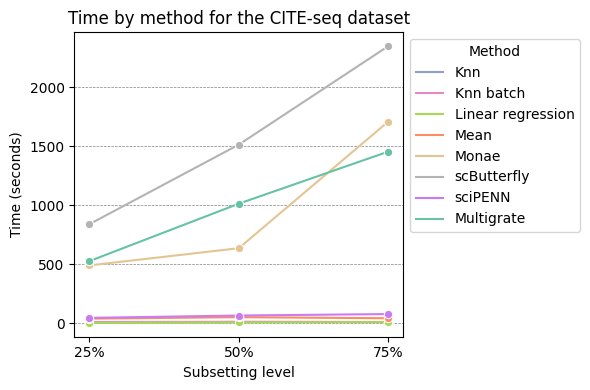

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

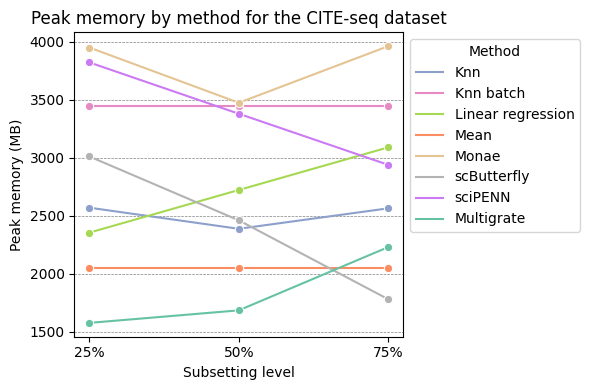

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

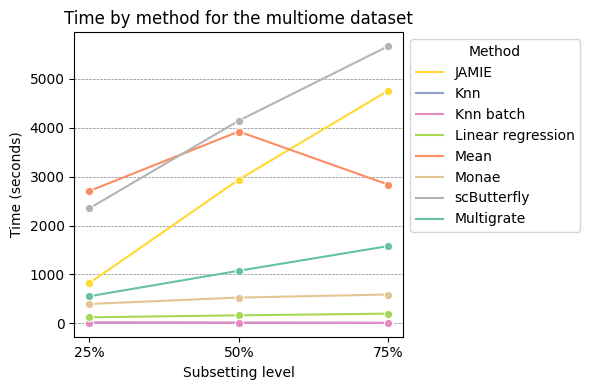

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

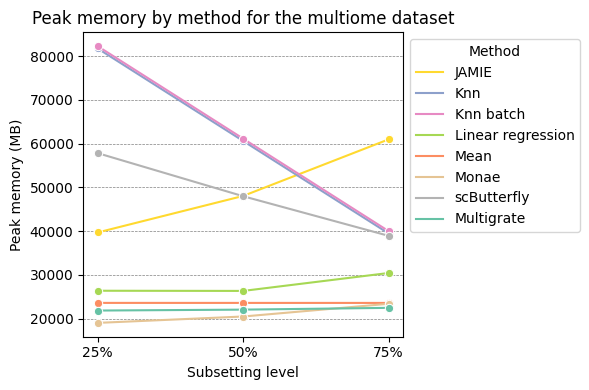

In [15]:
for modality in ['cite', 'multiome']:   
    df_modality = df[df['setting'].str.contains(modality)]
    for feature in ['time_sec', 'peak_memory_mb']:
        plt.figure(figsize=(6, 4))
        sns.lineplot(x='setting', y=feature, data=df_modality, hue='method', legend=True, marker='o', palette=palette)
        if modality == 'cite':
            modality_title = 'CITE-seq'
        else:
            modality_title = 'multiome'
        if feature == 'time_sec':
            plt.title(f'Time by method for the {modality_title} dataset')
        else:
            plt.title(f'Peak memory by method for the {modality_title} dataset')
        plt.xlabel('Setting')
        if feature == 'time_sec':
            plt.ylabel('Time (seconds)')
        else:
            plt.ylabel('Peak memory (MB)')
        plt.legend(title='Method', loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=0)
        plt.xlabel('Subsetting level')
        plt.xticks(ticks=[f'{modality}_25', f'{modality}_50', f'{modality}_75'],
                   labels=['25%', '50%', '75%'])
        plt.tight_layout()
        plt.savefig(f'figures/{feature}_{modality}.svg')
        plt.show()